In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd  
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


In [10]:
df = pd.read_csv('loan_data.csv')
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [11]:
df.isna().sum()

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

In [12]:
X = df.drop(['loan_status'], axis=1)
y = df['loan_status']
X = pd.get_dummies(X,drop_first=True)

In [13]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.23,random_state=0)

In [14]:
reg =LogisticRegression()
reg.fit(X_train,y_train)

reg.score(X_test,y_test)


c:\Anaconda\envs\dul01\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8264734299516908

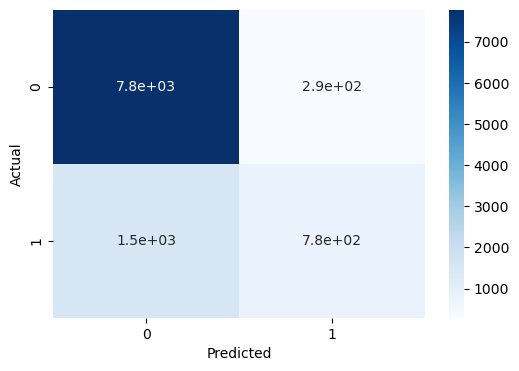

In [15]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,reg.predict(X_test))

import seaborn as sns 
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [16]:
df.shape

(45000, 14)

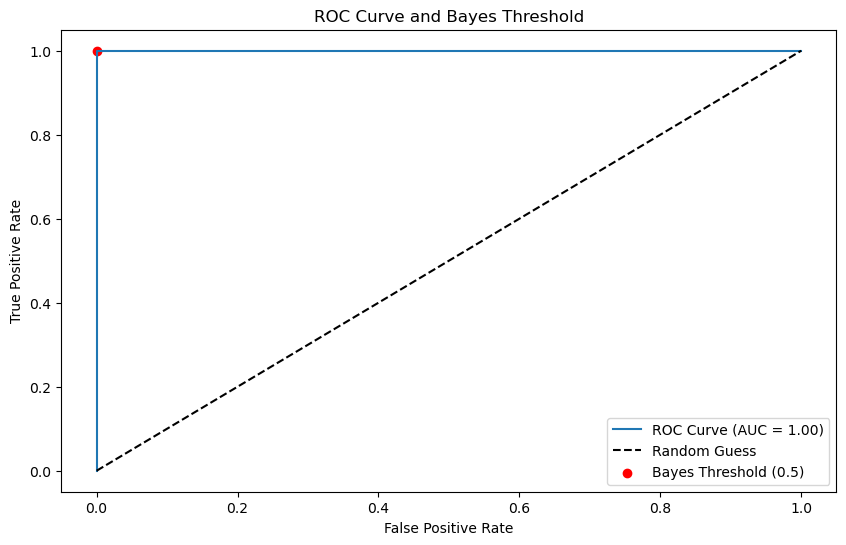

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, roc_auc_score

# Load Iris dataset and select only two classes (binary classification)
data = load_iris()
X = data.data[data.target != 2]  # Only classes 0 and 1
y = data.target[data.target != 2]

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Get predicted probabilities for class 1
probabilities = knn.predict_proba(X_test)[:, 1]  # Probabilities for class 1

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, probabilities)
auc_score = roc_auc_score(y_test, probabilities)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.title('ROC Curve and Bayes Threshold')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()

# Illustrate Bayes Threshold (e.g., 0.5)
bayes_threshold = 0.5
predicted_labels = (probabilities >= bayes_threshold).astype(int)

# Compute the TP and FP rates for the selected threshold
tp_rate = np.sum((predicted_labels == 1) & (y_test == 1)) / np.sum(y_test == 1)
fp_rate = np.sum((predicted_labels == 1) & (y_test == 0)) / np.sum(y_test == 0)

# Plot the point for the Bayes Threshold
plt.scatter(fp_rate, tp_rate, color='red', label=f'Bayes Threshold (0.5)')

plt.legend()
plt.show()
